In [ ]:
from google.colab import drive

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ifile = load_file('/content/gdrive/My Drive/OUTRUN/OUTRUN_TIME/final_prepared_train_images_time.pkl')

In [6]:
type(ifile)

list

In [ ]:
imgs = []
numbers = []
for i in ifile:
  imgs.append(i[0])
  numbers.append(i[1])

In [8]:
ifile[0][0].shape

(16, 17)

In [ ]:
# useful methods
def captcha_to_vec(captcha):    
    vector = np.zeros(word_len * word_class)
    
    for i,ch in enumerate(captcha):
        idex = i * word_class + char_indices[ch]
        vector[idex] = 1
    return vector

def vec_to_captcha(vec):
    text = []
    vec[vec < 0.5] = 0
        
    char_pos = vec.nonzero()[0]
    
    for i, ch in enumerate(char_pos):
        text.append(captcha_word[ch % word_class])
    return ''.join(text)

# parameters

captcha_word = "0123456789"

word_len = 2
word_class = len(captcha_word)

char_indices = dict((c, i) for i,c in enumerate(captcha_word))
indices_char = dict((i, c) for i,c in enumerate(captcha_word))

In [10]:
# test
captcha_to_vec(str(numbers[789])),len(captcha_to_vec(str(numbers[789])))

(array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0.]), 20)

In [ ]:
vec_numbers = np.array([captcha_to_vec(str(i)) for i in numbers])

In [12]:
np.array(imgs).shape

(785600, 16, 17)

In [13]:
np.expand_dims(np.array(imgs), axis=-1).shape

(785600, 16, 17, 1)

In [ ]:
imgs = np.expand_dims(np.array(imgs), axis=-1)

# model development

In [15]:
input_shape =  (16, 17, 1)
print(input_shape)

(16, 17, 1)


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: x/255,input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(list(np.arange(0,len(vec_numbers))), list(np.arange(0,len(vec_numbers))), test_size=0.05, random_state=42)

In [19]:
model.fit(imgs[X_train,:,:,:], vec_numbers[X_train,:], batch_size = 512, epochs=20)

Epoch 1/20
1458/1458 [==============================] - 459s 315ms/step - loss: 0.0305 - accuracy: 0.6650
Epoch 2/20
1458/1458 [==============================] - 459s 315ms/step - loss: 9.9898e-04 - accuracy: 0.6746
Epoch 3/20
1458/1458 [==============================] - 459s 315ms/step - loss: 8.5387e-04 - accuracy: 0.7065
Epoch 4/20
1458/1458 [==============================] - 456s 313ms/step - loss: 7.5353e-04 - accuracy: 0.7054
Epoch 5/20
1458/1458 [==============================] - 456s 313ms/step - loss: 6.8489e-04 - accuracy: 0.7003
Epoch 6/20
1458/1458 [==============================] - 454s 311ms/step - loss: 6.2433e-04 - accuracy: 0.6549
Epoch 7/20
1458/1458 [==============================] - 456s 313ms/step - loss: 5.6526e-04 - accuracy: 0.5920
Epoch 8/20
1458/1458 [==============================] - 454s 311ms/step - loss: 5.3932e-04 - accuracy: 0.5714
Epoch 9/20
1458/1458 [==============================] - 456s 313ms/step - loss: 5.1323e-04 - accuracy: 0.6298
Epoch 10/20
14

NameError: ignored

In [20]:
test_loss, test_accuracy = model.evaluate(imgs[X_test], vec_numbers[y_test])

1228/1228 [==============================] - 10s 8ms/step - loss: 3.6785e-04 - accuracy: 0.6343


In [ ]:
model.save('/content/gdrive/My Drive/OUTRUN/OUTRUN_TIME/'+'model_time_outrun.h5')

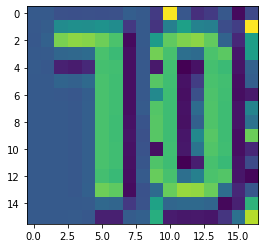

70


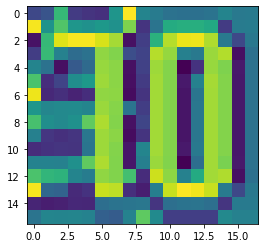

70


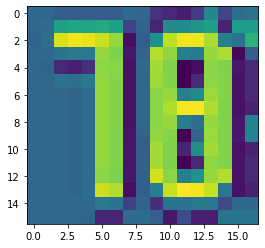

78


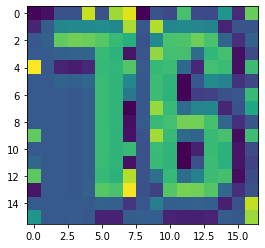

76


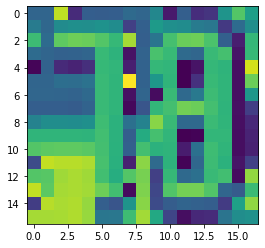

78


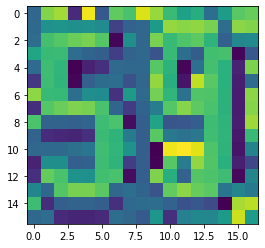

59


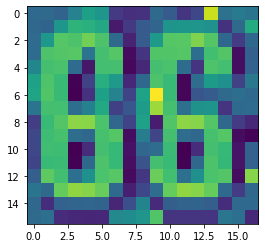

66


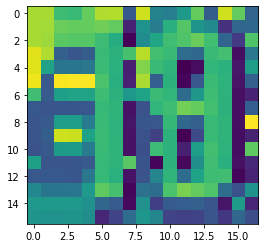

78


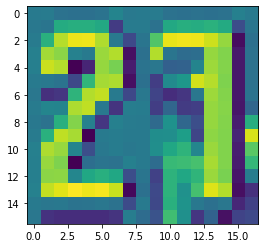

27


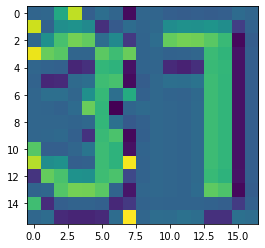

37


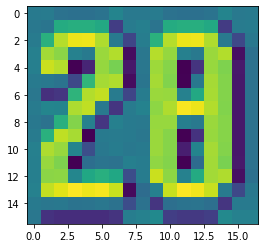

28


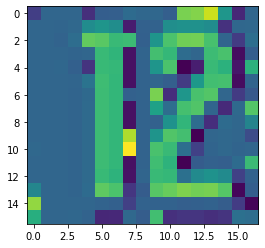

12


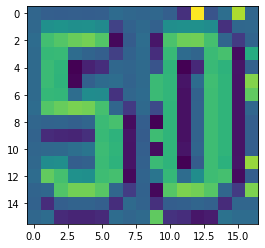

50


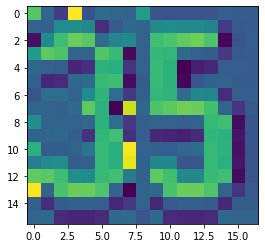

35


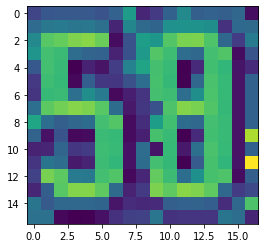

58


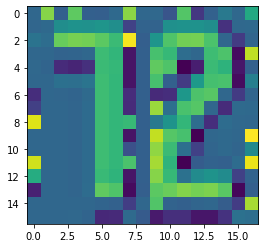

72


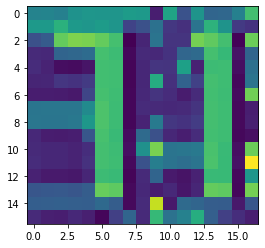

71


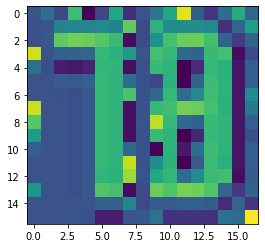

78


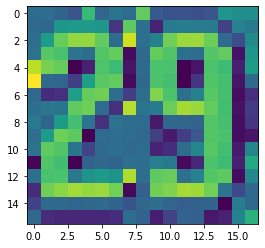

29


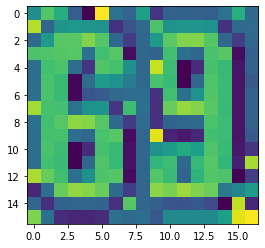

69


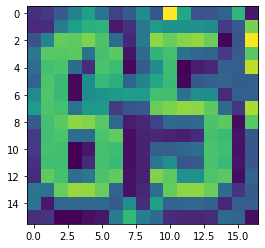

65


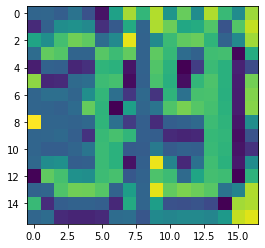

39


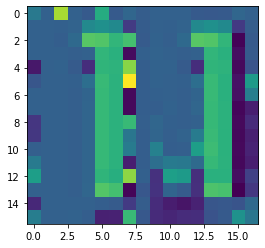

11


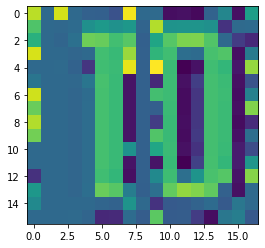

10


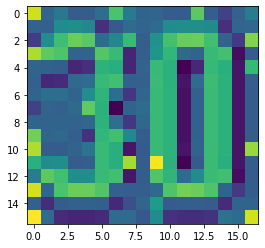

30


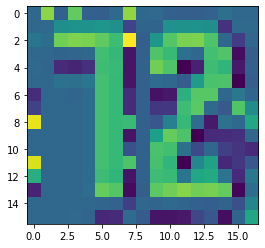

72


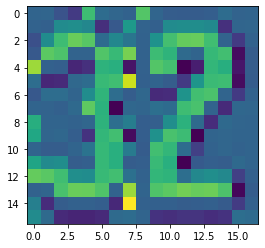

32


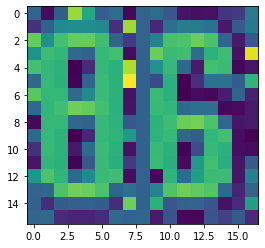

86


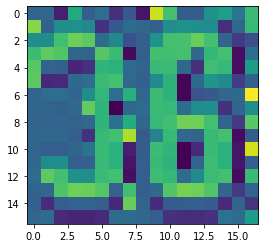

36


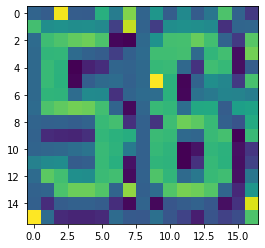

56


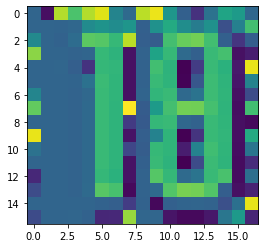

18


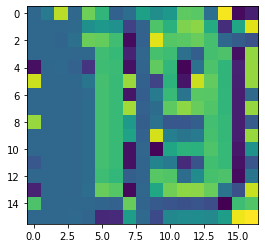

19


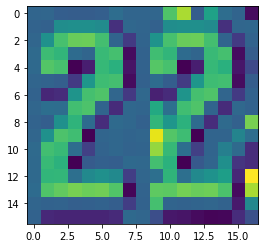

22


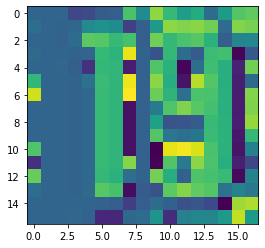

19


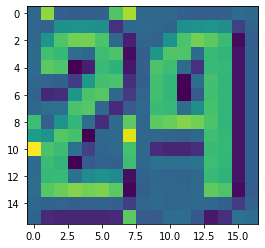

24


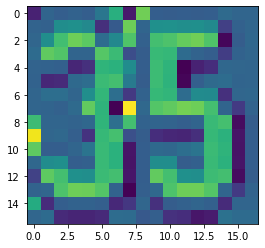

35


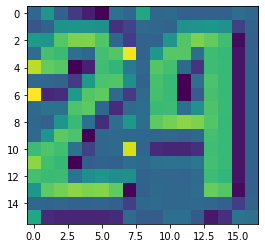

24


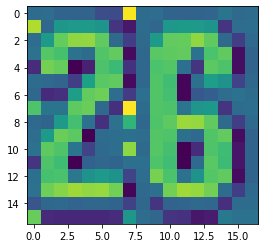

26


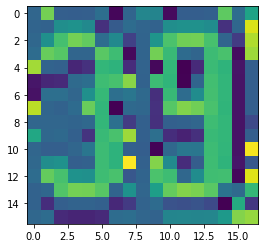

39


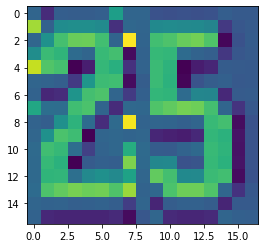

25


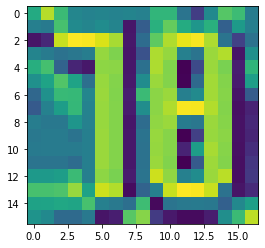

78


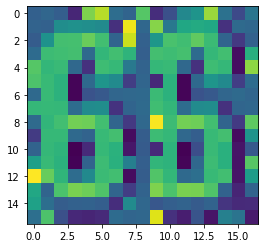

66


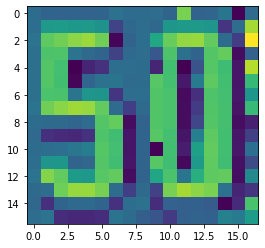

50


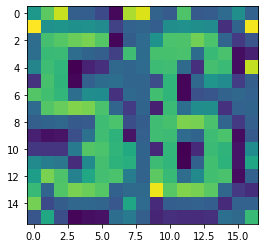

56


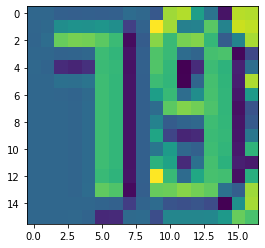

79


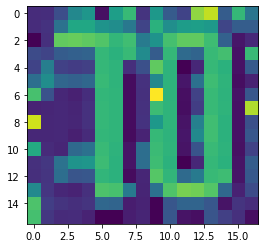

70


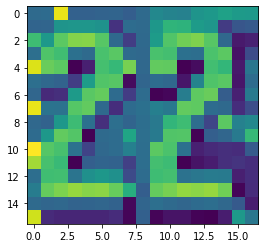

22


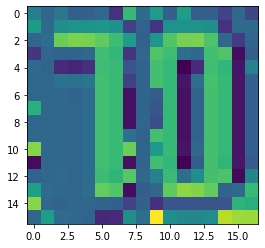

70


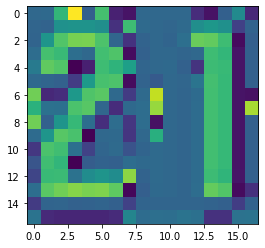

21


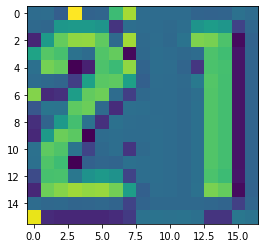

21


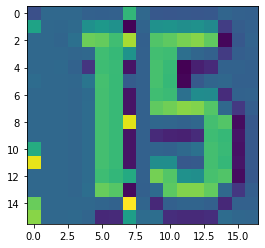

15


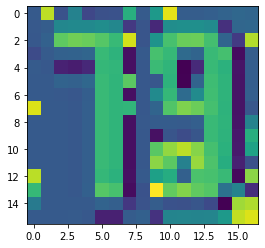

79


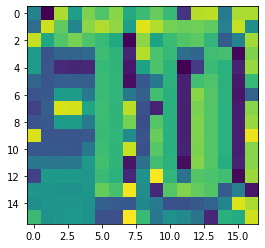

70


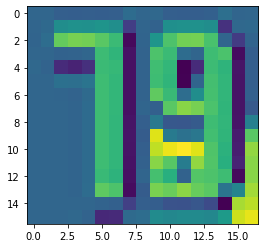

79


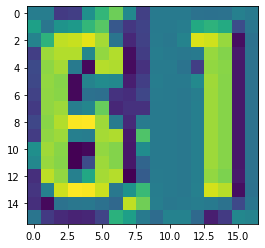

61


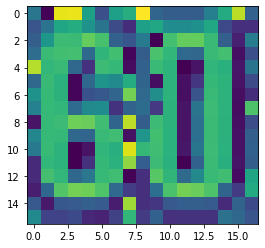

60


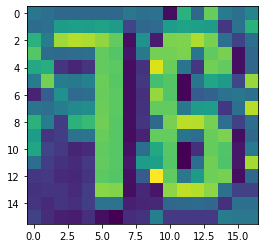

76


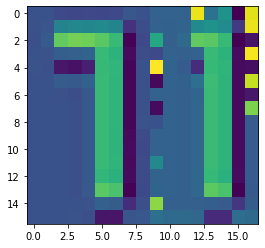

71


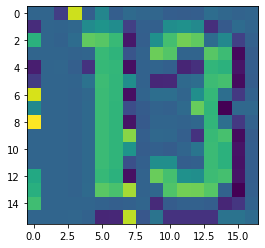

13


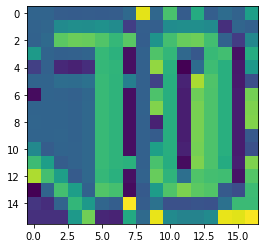

70


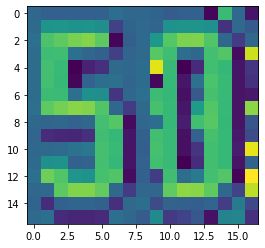

50


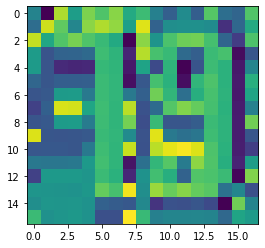

79


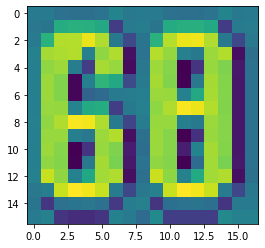

68


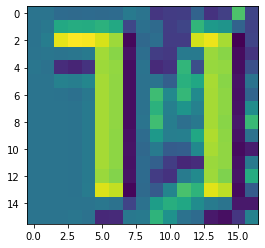

71


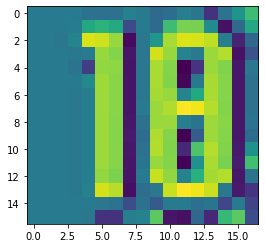

18


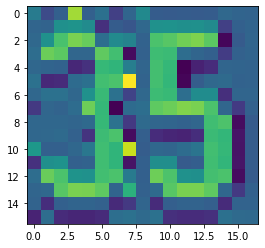

35


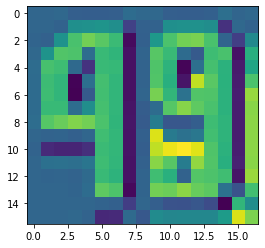

49


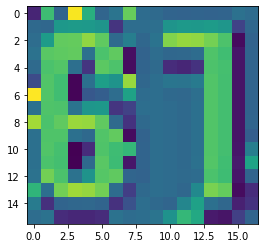

67


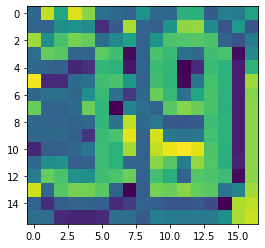

39


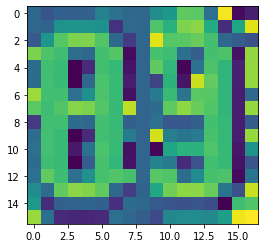

89


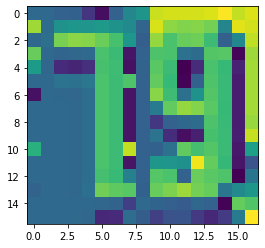

79


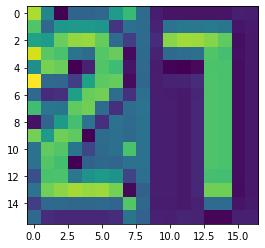

27


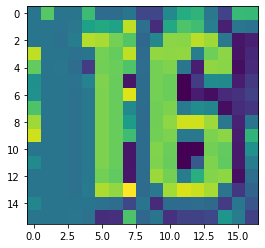

16


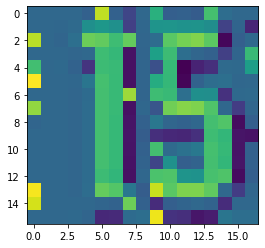

15


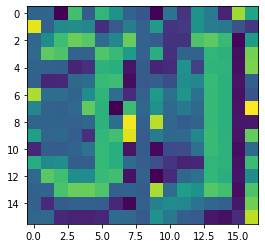

31


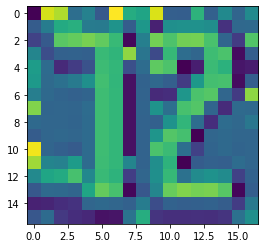

72


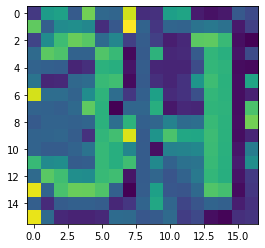

31


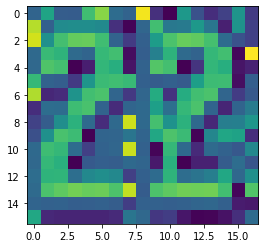

22


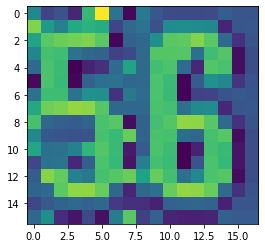

56


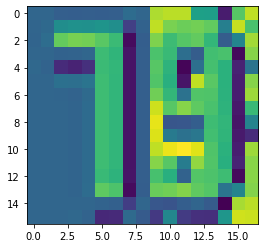

79


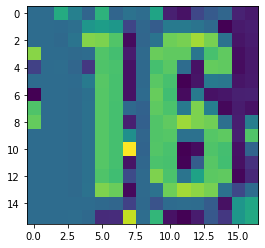

16


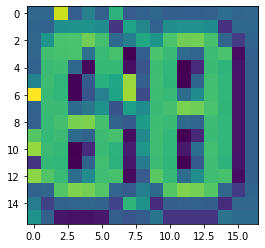

68


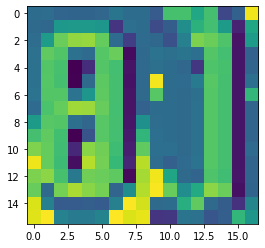

81


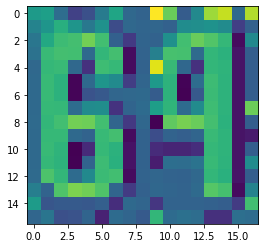

64


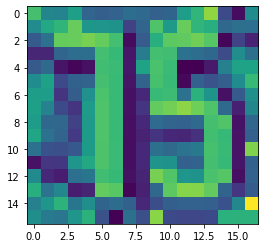

75


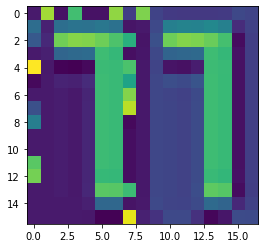

77


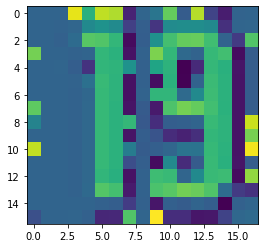

19


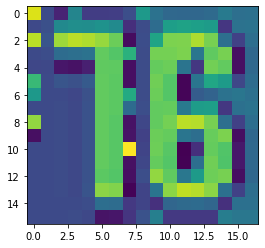

76


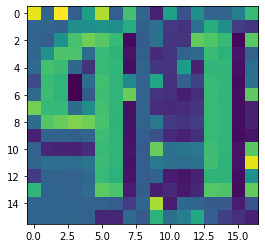

41


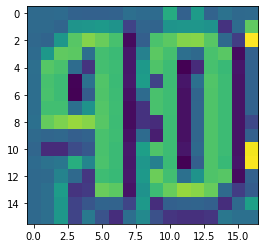

40


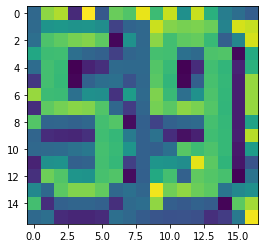

59


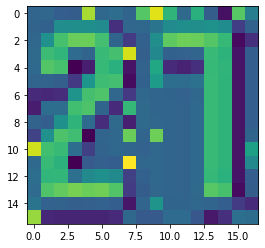

27


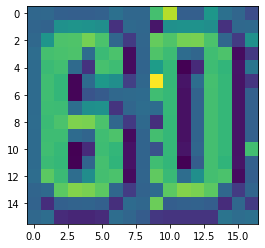

60


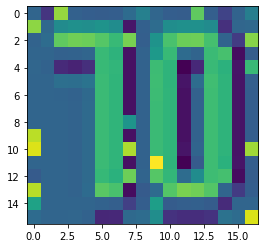

70


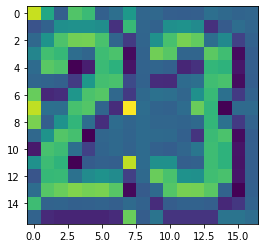

23


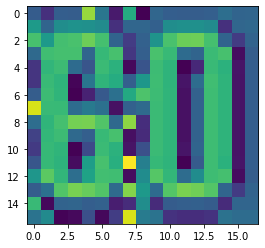

60


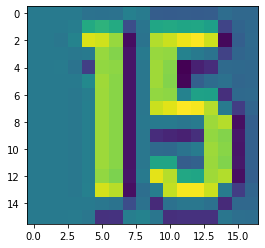

15


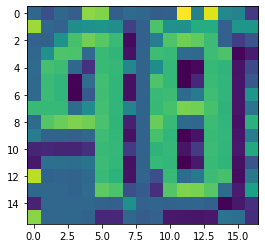

48


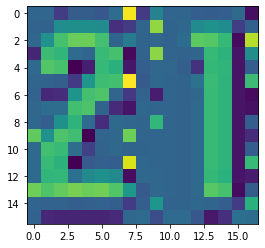

21


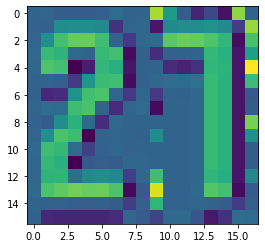

27


In [22]:
for i in np.random.randint(0,len(imgs),100):
  plt.imshow(imgs[i][:,:,0])
  plt.show()
  print(vec_to_captcha(model.predict(np.expand_dims(imgs[i],axis=0))[0]))